In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def Altitude(z0,p,T):
    R = 287.0; ###unit:J/kgK
    g = 9.81; ###unit:m/s2
    z = np.zeros((p.shape));
    for i in range(p.size):
        s_int = 0.0;
        for j in np.arange(0,i,1):
            s_int = s_int+(T[j]/p[j]+T[j+1]/p[j+1])*(p[j+1]-p[j])/2.0; ###trapezoidal integral
        z[i] = z0-R/g*s_int;
    return z

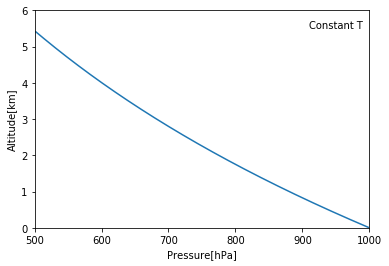

In [2]:
####Part (b)   constant temperatures
z0 = 0.0;
p_test = np.arange(100000,50100,-100);
T0 = -5+273.15; ###unit:K
T_test = np.ones(p_test.size)*T0; ###constant temperature
z_test = Altitude(z0,p_test,T_test);

plt.plot(p_test/100,z_test/1000);
plt.xlim([500,1000]);plt.ylim([0,6]);
plt.xlabel('Pressure[hPa]');
plt.ylabel('Altitude[km]');
plt.text(910,5.5,'Constant T');

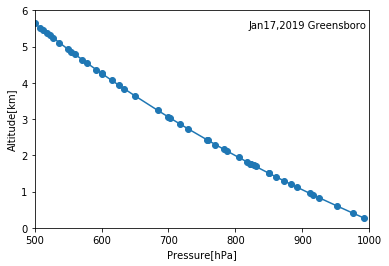

In [4]:
####Part (c)   Jan 17,2019 Greensboro
data = pd.ExcelFile('C:\Users\yguo20\Desktop\Dynamic Meteorology\Homework\HW2/HW2_data.xlsx');
df = data.parse('Sheet1');
cat_p = df['p (hPa)'][:];
p = 100*pd.Series(cat_p).values;
cat_T = df['T (C)'][:];
T = pd.Series(cat_T).values+273.15;
z0 = pd.Series(df['z (m)'][0:1]).values;
z = Altitude(z0,p,T);

plt.plot(p/100,z/1000,'-o');
plt.xlim([500,1000]);plt.ylim([0,6]);
plt.xlabel('Pressure[hPa]');
plt.ylabel('Altitude[km]');
plt.text(820,5.5,'Jan17,2019 Greensboro');

In [21]:
####Part (d)
i_850 = np.where(p==850*100)[0][0];
print ('z_850 = '+str(z[i_850])+ 'm');   ###1505m

i_700 = np.where(p==700*100)[0][0];
print ('z_700 = '+str(z[i_700])+ 'm');   ###3056m

i_500 = np.where(p==500*100)[0][0];
print ('z_500 = '+str(z[i_500])+ 'm');   ###5643m

z_850 = 1505.30766469m
z_700 = 3056.2309689m
z_500 = 5643.58201325m


z_850 = 1496.26779453m
z_700 = 3035.82966454m
z_500 = 5603.49083556m


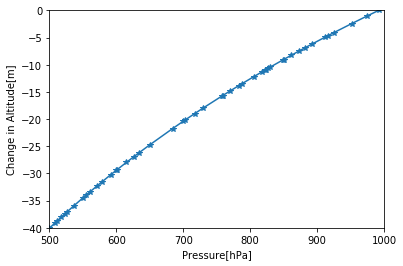

In [22]:
####Part (e)
T = pd.Series(cat_T).values-2+273.15; ###decrease by 2 degree
z0 = pd.Series(df['z (m)'][0:1]).values;
z1 = Altitude(z0,p,T);

i_850 = np.where(p==850*100)[0][0];
print ('z_850 = '+str(z1[i_850])+ 'm');  ###1496m

i_700 = np.where(p==700*100)[0][0];
print ('z_700 = '+str(z1[i_700])+ 'm');  ###3036m

i_500 = np.where(p==500*100)[0][0];
print ('z_500 = '+str(z1[i_500])+ 'm');  ###5603m


plt.plot(p/100,z1-z,'-*');
plt.xlim([500,1000]);plt.ylim([-40,0]);
plt.xlabel('Pressure[hPa]');
plt.ylabel('Change in Altitude[m]');